In [ ]:
users = [ 
{ "id": 0, "name": "Hero" },{ "id": 1, "name": "Dunn" }, 
{ "id": 2, "name": "Sue" }, 
{ "id": 3, "name": "Chi" }, 
{ "id": 4, "name": "Thor" }, 
{ "id": 5, "name": "Clive" }, 
{ "id": 6, "name": "Hicks" }, 
{ "id": 7, "name": "Devin" }, 
{ "id": 8, "name": "Kate" }, 
{ "id": 9, "name": "Klein" } 
]

In [ ]:
# another way of populate the users dict above
names = ["Hero","Dunn","Sue","Chi","Thor","Clive","Hicks","Devin","Kate","Klein"]

users = [{"id": id, "name": name,"friend":[]} for id, name in enumerate(names)]
users

[{'friend': [], 'id': 0, 'name': 'Hero'},
 {'friend': [], 'id': 1, 'name': 'Dunn'},
 {'friend': [], 'id': 2, 'name': 'Sue'},
 {'friend': [], 'id': 3, 'name': 'Chi'},
 {'friend': [], 'id': 4, 'name': 'Thor'},
 {'friend': [], 'id': 5, 'name': 'Clive'},
 {'friend': [], 'id': 6, 'name': 'Hicks'},
 {'friend': [], 'id': 7, 'name': 'Devin'},
 {'friend': [], 'id': 8, 'name': 'Kate'},
 {'friend': [], 'id': 9, 'name': 'Klein'}]

In [ ]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [ ]:
for i,j in friendships:
  users[i]['friend'].append(j)
  users[j]['friend'].append(i)
users

[{'friend': [1, 2], 'id': 0, 'name': 'Hero'},
 {'friend': [0, 2, 3], 'id': 1, 'name': 'Dunn'},
 {'friend': [0, 1, 3], 'id': 2, 'name': 'Sue'},
 {'friend': [1, 2, 4], 'id': 3, 'name': 'Chi'},
 {'friend': [3, 5], 'id': 4, 'name': 'Thor'},
 {'friend': [4, 6, 7], 'id': 5, 'name': 'Clive'},
 {'friend': [5, 8], 'id': 6, 'name': 'Hicks'},
 {'friend': [5, 8], 'id': 7, 'name': 'Devin'},
 {'friend': [6, 7, 9], 'id': 8, 'name': 'Kate'},
 {'friend': [8], 'id': 9, 'name': 'Klein'}]

In [ ]:
# the average friend per users
def number_of_friends(user):
  return len(user['friend'])

average_friend_per_user = sum([number_of_friends(user) for user in users]) / len(users)
average_friend_per_user

2.4

In [ ]:
# sort the id by number of friend (id,num_of_friends)
number_of_friends_by_id = [(user['id'],number_of_friends(user)) for user in users]
sorted(number_of_friends_by_id,key=lambda t:t[1],reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [ ]:
# find friend of friend
# test1
def friend_of_friend(user):
  return [x
          for friend_id in users[user]['friend']
          for x in users[friend_id]['friend']
          if x!=user and x not in users[user]['friend']]

#def not
from collections import Counter
Counter(friend_of_friend(3))

Counter({0: 2, 5: 1})

In [ ]:
# test 2
def friend_of_friend2(user): # users[3]
  return Counter(friend_of_friend_id
          for friend_id in user['friend']
          for friend_of_friend_id in users[friend_id]['friend']
          if friend_of_friend_id != user['id']
          and friend_of_friend_id not in user['friend'])
friend_of_friend2(users[3])

Counter({0: 2, 5: 1})

In [ ]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [ ]:
# find people with common interest
def common_interest(common_interest):
  return [user_id
          for user_id, interest in interests
          if interest == common_interest]
common_interest("Java")


[0, 5, 9]

In [ ]:
from collections import defaultdict
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

interest_by_user_ids = defaultdict(list)

for user_id,interest in interests:
  interest_by_user_ids[user_id].append(interest)

In [ ]:
def most_common_interests_with(user): # users[0]
  return Counter(id for interest in interest_by_user_ids[user['id']]
                 for id in user_ids_by_interest[interest]
                 if user['id'] != id)
most_common_interests_with(users[3])

Counter({2: 1, 4: 1, 5: 2, 6: 2})

In [ ]:
salaries_and_tenures = [
    (83000, 8.7), (88000, 8.1),
    (48000, 0.7), (76000, 6),
    (69000, 6.5), (76000, 7.5),
    (60000, 2.5), (83000, 10),
    (48000, 1.9), (63000, 4.2)]

In [ ]:
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

salary_by_tenure = defaultdict(list)

for salary,tenure in salaries_and_tenures:
  salary_by_tenure[tenure_bucket(tenure)].append(salary)

average_salary_by_tenure = {
    tenure: sum(salary)/len(salary)
    for tenure,salary in salary_by_tenure.items() # without items, only keys will generate
}
average_salary_by_tenure

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}

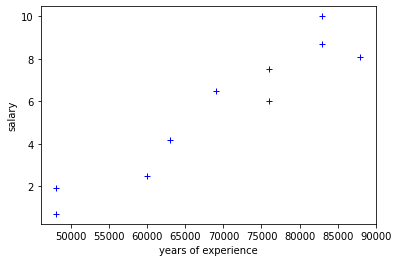

In [ ]:
# plot salary vs. experience
import matplotlib.pyplot as plt
plt.plot([s[0] for s in salaries_and_tenures],
         [s[1] for s in salaries_and_tenures],
         'b+') # --- the type of marker appeared on the graph
plt.ylabel('salary')
plt.xlabel('years of experience')
plt.show()

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


'df'